In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.tsa.api as smt

In [13]:
df = pd.read_csv('../data/Winter negative temperature sum in deg C 1781  1988.csv', index_col=0)
df['t'] = df.index.values + 1780
df.head()

,x,t
1,272.3,1781
2,207.8,1782
3,545.7,1783
4,557.5,1784
5,260.6,1785


Text(0, 0.5, 'Сумма отрицательных температур')

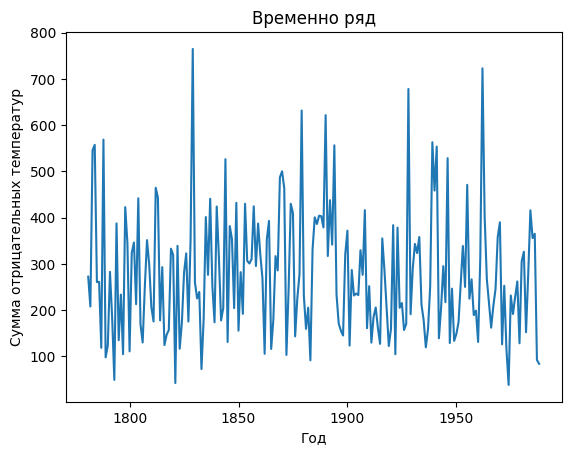

In [16]:
plt.plot(df.t, df.x)

plt.title("Временно ряд")
plt.xlabel("Год")
plt.ylabel("Сумма отрицательных температур")

Тест Дики-Фуллера 

In [17]:
from statsmodels.tsa.stattools import adfuller

def adFulersTest(ts: list, name, alpha=0.05):
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistics', 'p-value', 'Lags Used', 'Number of observations used'])

    for key, val in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = val

    print(f"Тест \"{name}\":")
    print(dfoutput)

    if dfoutput['p-value'] < alpha:
        print(f"Значение p меньше {alpha*100.0} %. Ряд стационарный")
    else:
        print(f"Значение p меньше {alpha*100.0} %. Ряд не стационарный\n")



adFulersTest(df.x, "Температура")

Тест "Температура":
Test Statistics               -1.312193e+01
p-value                        1.556814e-24
Lags Used                      0.000000e+00
Number of observations used    2.070000e+02
Critical value (1%)           -3.462342e+00
Critical value (5%)           -2.875606e+00
Critical value (10%)          -2.574267e+00
dtype: float64
Значение p меньше 5.0 %. Ряд стационарный


Удаление тренда

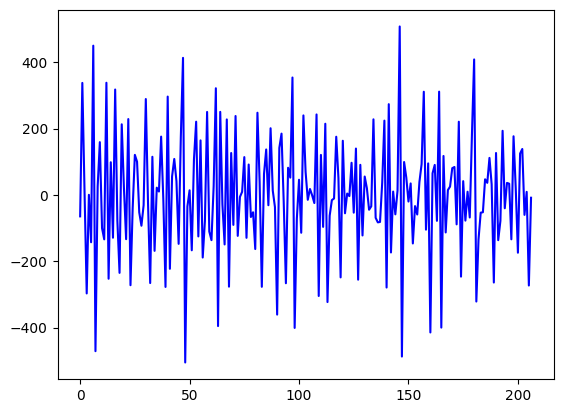

In [21]:
nottrend = []

for i in range(1, len(df.x)):
    nottrend.append(df.x.iloc[i] - df.x.iloc[i-1])

plt.plot(nottrend, color='blue')

In [22]:
adFulersTest(nottrend, "Температура (1 дифферинцирование))")

Тест "Температура (1 дифферинцирование))":
Test Statistics               -7.461548e+00
p-value                        5.337534e-11
Lags Used                      1.400000e+01
Number of observations used    1.920000e+02
Critical value (1%)           -3.464875e+00
Critical value (5%)           -2.876714e+00
Critical value (10%)          -2.574859e+00
dtype: float64
Значение p меньше 5.0 %. Ряд стационарный


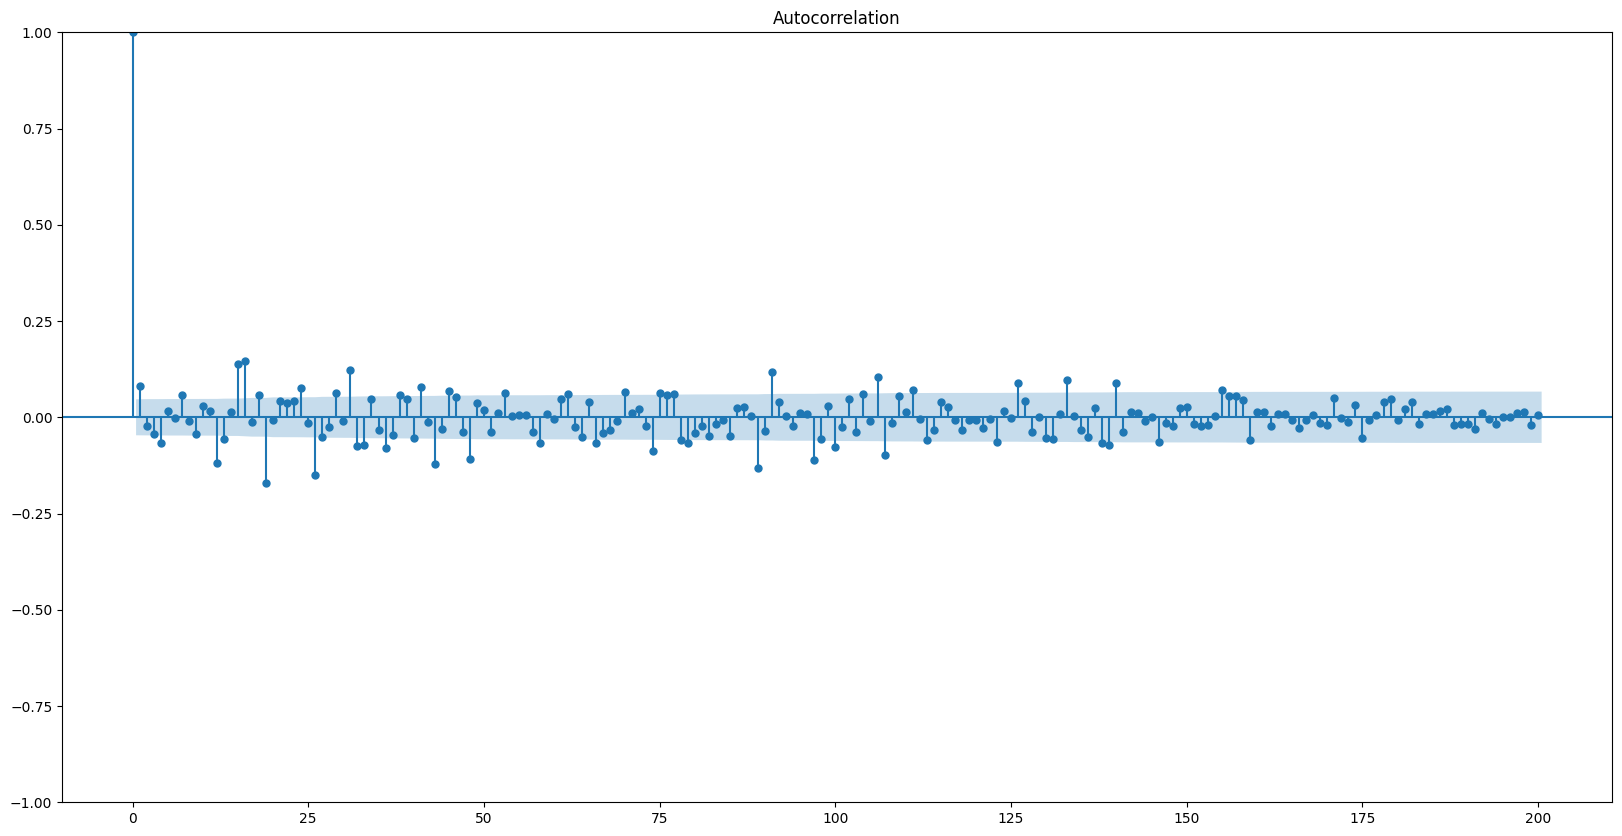

In [38]:
fig, axs = plt.subplots(figsize=(20, 10))
smt.graphics.plot_acf(df.x, lags=200, ax=axs, alpha=0.5)
None